昨天刷B站看到B站跨年晚会9.9分好评，抱着试试的态度，结果控制不住自己刷了两遍，书到用时方恨少，只想用两个字概括"卧槽"。
![](img/rating.png)
![](img/2.png)
B站内容安排精彩，拿捏住了不同年代的情怀点，比如1980-1990的港台风、1990-2000年代数码宝贝柯南、2000-2020年代魔兽世界，每个人的时代联结略有不同，这仅是我自己的感受。

除了内容，弹幕互动也是挺令人舒爽的事情，精彩来临时刻也就是弹幕大军压镜的时候，我把我认为比较精彩的部分截图制作成了小视频。

## 小视频

这次我采集了跨年晚会的两种数据
- 弹幕数据，正在观看时用户的感受
- 评论数据，已观看完成的用户感受

爬虫制作成视频教程已经上传至千聊课程中，感兴趣的同学可以关注一下

### 弹幕分析
B站晚会有三个篇章，每个篇章视频长度大约60-70min。我们采集的数据集字段包括：
- Date：采集时间2019.01.03,所以有三天的弹幕
- Chapter: 第几个篇章，B站跨年有三个篇章，每个篇章60min左右
- VideoTime: 在Chapter中的当前播放时间（相对于篇章开头的秒数）
- SenderId: 弹幕发送者的匿名ID
- DanMuContent: 弹幕文本内容

In [ ]:
import pandas as pd

df = pd.read_csv('data/弹幕new.csv')
#剔去重复项
df.drop_duplicates(inplace=True)
#查看数据个数
print(len(df))
#显示前5行
df.head()

# df1
VideoTime很可能是字符串，我们先将其变为浮点数。然后我们查看每个章节最大时间长度。

In [41]:
def str2float(string):
    #将VideoTime从字符串变为浮点数
    try: 
        return float(string)
    except:
        return 0.0

df['VideoTime'] = df['VideoTime'].apply(str2float)
print('Chapter 1', df[df['Chapter']==1]['VideoTime'].max())
print('Chapter 2', df[df['Chapter']==2]['VideoTime'].max())
print('Chapter 3', df[df['Chapter']==3]['VideoTime'].max())

Chapter 1 4253.188
Chapter 2 4000.27
Chapter 3 4555.0


我们想做弹幕的时间线上的分布，所以需要把三个在时间上考虑先后

In [ ]:
chapter1 = df[df['Chapter']==1]
chapter2 = df[df['Chapter']==2]
chapter3 = df[df['Chapter']==3]

#将时间放在一个时间线上
chapter2['VideoTime'] = chapter2['VideoTime']+ 4253.188
chapter3['VideoTime'] = chapter3['VideoTime']+ 4253.188 + 4000.27

#合并chapter1， chapter2， chapter3
chapter = pd.concat([chapter1, chapter2, chapter3])
#VideoTime升序
chapter.sort_values(by='VideoTime', ascending=True, inplace=True)
chapter

# df2 
我们想看一下各个章节在时间上弹幕量的分布情况(以min为单位),

- 横坐标为分钟刻度
- 纵坐标为弹幕量



In [ ]:
def second2minute(second):
    #将VideoTime从秒数变为分钟数
    try:
        return int(float(second)/60)
    except:
        return 0


chapter['VideoTime'] = chapter['VideoTime'].apply(second2minute)
chapter

# df3

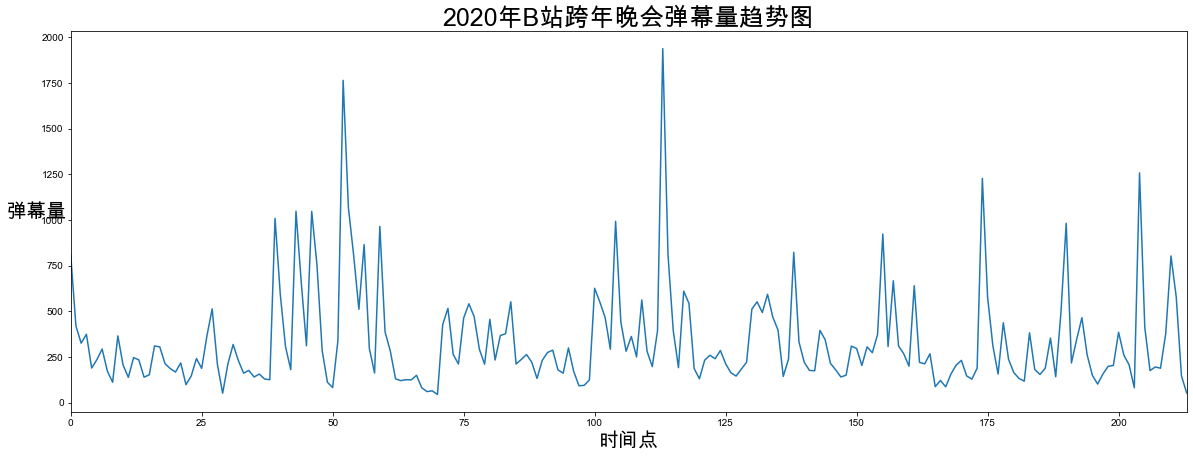

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
danmudf = chapter.groupby('VideoTime').agg({'DanMuContent': ['count']})
danmudf.plot(kind='line', figsize=(20, 7), legend=False)
plt.title("2020年B站跨年晚会弹幕量趋势图", fontweight='bold', fontsize=25)
plt.xlabel('时间点', fontweight='bold', fontsize=20)
plt.ylabel('弹幕量', fontweight='bold', fontsize=20, rotation=0)
plt.show()

从上图可以看到用户发弹幕量相对比较集中的区间为:
- (37, 63) 
- (100, 120)
- 之后都是独峰

### 37-63阶段
这是第一篇章中后期，也是整个晚会高潮迭起的阶段。
依次有冯提莫、动漫歌曲(如butterfly)、种花组曲(如钢铁洪流进行曲）三种不同类型的表演杂糅在一起。

冯提莫的甜美
![](img/冯提莫.png)
动漫歌曲的青春回忆
![](img/泪目.png)
有一种家叫“国家”
![](img/钢铁.png)

### 115附近
115min，也就是第二篇章40min附近。附近的节目

**骄傲的少年**（曲子是《那年那兔那些事》）
![](img/兔子.png)

后面的比较陡峭的小山峰时间点上还有几个大碗，比如邓紫棋、吴亦凡、五月天，就不粘贴截图了。

### 弹幕内容分析

In [ ]:
import re
import jieba
import csv
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType


# 读取文件中的文本
text = ''.join(df['DanMuContent'])
#剔除非中文的内容（只保留中文）
text = ''.join(re.findall(r'[\u4e00-\u9fa5]+', text))
wordlist = jieba.lcut(text)
wordset = [w for w in set(wordlist) if len(w)>1]
wordfreq = []
#词语计数
for word in wordset:
    freq = wordlist.count(word)
    wordfreq.append((word, freq))
# 词频排序
wordfreq = sorted(wordfreq, key=lambda k:k[1], reverse=True)

wordcloud =WordCloud()
wordcloud.add("",
              wordfreq,
              word_size_range=[20,100])
wordcloud.set_global_opts(title_opts=opts.TitleOpts(title="2020年B站跨年晚会"))
wordcloud.render('B站跨年.html')
wordcloud.render_notebook()

![](img/词云.png)
这几个大字啊啊啊，哈哈哈, 卧槽， 昔年快乐， 哔哩， 在B站有一群逗比陪你一起过年，这感觉很欢乐啊哈哈